In [2]:
# import libraries

import os
import pandas as pd
import seaborn as sns

In [3]:
pwd = os.getcwd()

filepath = pwd + '/two_cent_of_um_races.csv'

# import data
df = pd.read_csv(filepath)

/var/folders/j8/bvrywsx96hs740p4v7v0hqvh0000gn/T/ipykernel_83725/3440503816.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


**Clean Data**

Filter Data  
only want: USA, 2020, 50mi or 50km

In [21]:
df.shape

(7461195, 13)

In [ ]:
# show 50km and 50mi races

df[df['Event distance/length'] == '50mi']
df[df['Event distance/length'] == '50km']

In [ ]:
# combine using isin

df[df['Event distance/length'].isin(['50mi','50km'])]

In [ ]:
# show 2020 races

df[df['Year of event'] == 2020]

In [ ]:
# show USA races

df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']

In [ ]:
# combine all filters

df[(df['Event distance/length'].isin(['50mi','50km'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]

In [9]:
wip = df[(df['Event distance/length'].isin(['50mi','50km'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')].copy()

In [10]:
wip.shape

(26090, 13)

In [11]:
# remove (USA) from event name

wip['Event name'] = wip['Event name'].str.split('(').str.get(0)

In [12]:
# clean athleate age

wip['AthleteAge'] = 2020 - wip['Athlete year of birth']

In [13]:
# remove h from athlete performance

wip['Athlete performance'] = wip['Athlete performance'].str.split(' ').str.get(0)

In [14]:
# drop columns: Athlete Country, Athlete Country, Athlete Year of Birth, Athlete Age Category

wip = wip.drop(columns=['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'])

Null Values and Duplicates

In [15]:
# find nulls
wip.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
AthleteAge                   233
dtype: int64

In [16]:
# drop null values
wip = wip.dropna()

In [17]:
# check for duplicates
wip[wip.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,AthleteAge


In [ ]:
# reset index
wip.reset_index(drop = True)

Fix Data Types

In [22]:
wip.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
AthleteAge                   float64
dtype: object

In [24]:
wip['AthleteAge'] = wip['AthleteAge'].astype(int)

In [25]:
wip['Athlete average speed'] = wip['Athlete average speed'].astype(float)

In [26]:
wip.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
AthleteAge                     int64
dtype: object

In [37]:
# rename columns: 'Year of event', 'Event dates', 'Event name', 'Event distance/length', 'Event number of finishers', 'Athlete performance', 'Athlete gender', 'Athlete average speed', 'Athlete ID', 'AthleteAge'

wip = wip.rename(columns= {'Year of event':'Year', 
                           'Event dates':'RaceDay', 
                           'Event name':'RaceName', 
                           'Event distance/length':'RaceLength', 
                           'Event number of finishers':"RaceFinishersAmount", 
                           'Athlete performance':'AthletePerformance', 
                           'Athlete gender':'AthleteGender', 
                           'Athlete average speed':'AthleteAvgSpeed', 
                           'Athlete ID':'AthleteID'
                            })

In [41]:
# reorder columns

wip2 = wip[['RaceDay', 'RaceName', 'RaceLength', 'RaceFinishersAmount', 'AthleteID', 'AthleteGender', 'AthleteAge', 'AthletePerformance',  'AthleteAvgSpeed']]

visualizations

<Axes: xlabel='RaceLength', ylabel='Count'>

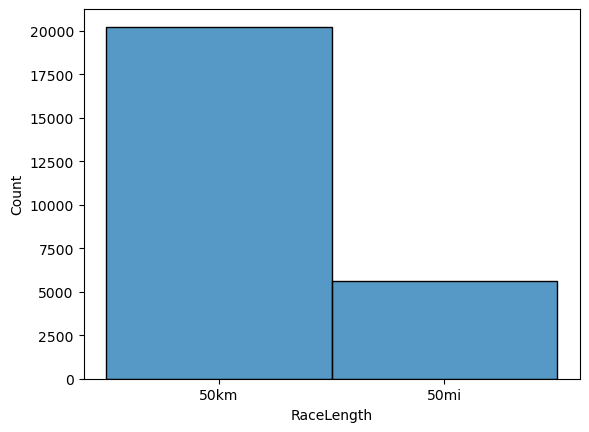

In [32]:
sns.histplot(wip2['RaceLength'])

<Axes: xlabel='RaceLength', ylabel='Count'>

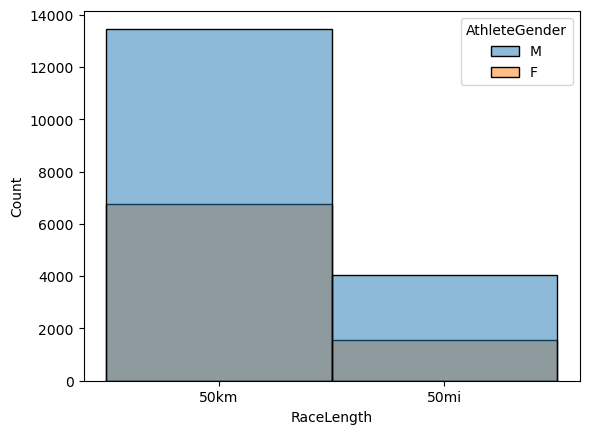

In [42]:
sns.histplot(wip2, x = 'RaceLength', hue = 'AthleteGender')

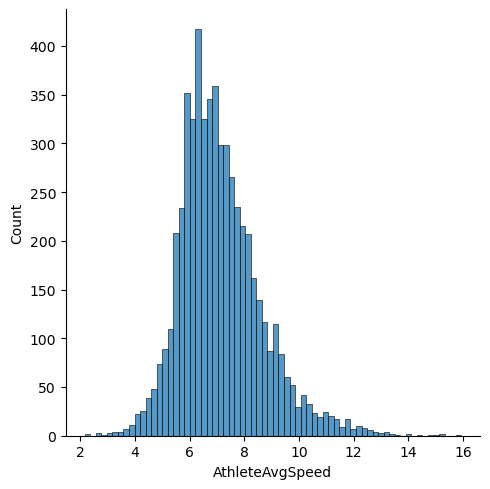

In [43]:
sns.displot(wip2[wip2['RaceLength'] == '50mi'] ['AthleteAvgSpeed'])

<Axes: xlabel='RaceLength', ylabel='AthleteAvgSpeed'>

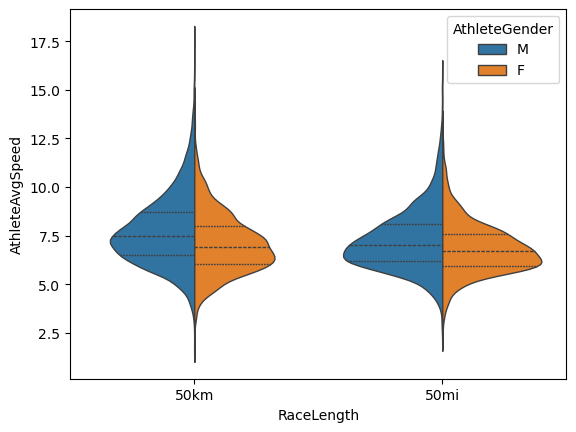

In [45]:
sns.violinplot(data = wip2, x = 'RaceLength', y = 'AthleteAvgSpeed', hue = 'AthleteGender', split = True, inner = 'quart', linewidth = 1)

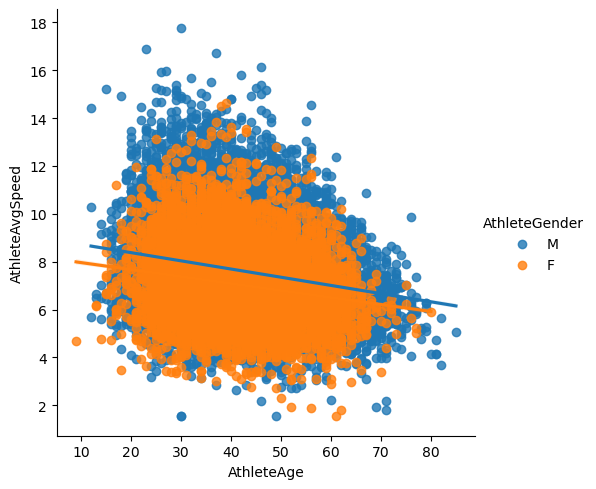

In [46]:
sns.lmplot(wip2, x= 'AthleteAge', y= 'AthleteAvgSpeed', hue= 'AthleteGender')

Questions

In [ ]:
'RaceDay', 'RaceName', 'RaceLength', 'RaceFinishersAmount', 'AthleteID', 'AthleteGender', 'AthleteAge', 'AthletePerformance',  'AthleteAvgSpeed'

In [47]:
# difference in speed between male/female, 50mi/50km

wip2.groupby(['RaceLength','AthleteGender'])['AthleteAvgSpeed'].mean()

RaceLength  AthleteGender
50km        F                7.083011
            M                7.738985
50mi        F                6.834371
            M                7.257633
Name: AthleteAvgSpeed, dtype: float64

In [53]:
# what age group do best racing 50mi (have 20 race min.), show 15

wip2.query('RaceLength == "50mi"').groupby('AthleteAge')['AthleteAvgSpeed'].agg(['mean','count']).sort_values('mean', ascending= False).query('count > 19').head(15)

,mean,count
AthleteAge,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


In [55]:
# what age group do worst racing 50mi (have 10 race min.), show 15

wip2.query('RaceLength == "50mi"').groupby('AthleteAge')['AthleteAvgSpeed'].agg(['mean','count']).sort_values('mean', ascending= True).query('count > 9').head(15)

,mean,count
AthleteAge,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10
60,6.261788,33
62,6.272730,37
61,6.358355,31
63,6.514806,31


In [73]:
# are athletes slower in summer vs winter
# spring 3-5
# summer 6-8
# fall 9-11
# winter 12-2

# extract month from RaceDay
wip2['RaceMonth'] = wip2['RaceDay'].str.split('.').str.get(1).astype(int)

# group month by season
wip2['RaceSeason'] = wip2['RaceMonth'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x >2 else 'Winter')

wip2.groupby('RaceSeason')['AthleteAvgSpeed'].agg(['mean','count']).sort_values('mean', ascending = False)

,mean,count
RaceSeason,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653


In [76]:
# avg speed and counter per season for 50mi

wip2.query('RaceLength == "50mi"').groupby('RaceSeason')['AthleteAvgSpeed'].agg(['mean','count']).sort_values('mean', ascending = False)

,mean,count
RaceSeason,,
Fall,7.511585,1997
Spring,7.082557,836
Winter,7.048442,1977
Summer,6.505776,817
